# Using Keras to solve muti-class image classification problem

---

**Importing necessary libraries**

In [0]:
import pandas as pd
import pickle
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers import BatchNormalization
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.utils import plot_model
from keras import backend as K
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization

# Loading the dataset

---



In [0]:
with open('train_image.pkl', 'rb') as f:
    data = pickle.load(f)
    data = np.array(data)
    data = data.reshape(-1, 28, 28)

In [0]:
with open('train_label.pkl', 'rb') as f:
    label = pickle.load(f)
    label = np.array(label)
    label = label.reshape(-1, 1)

# Splitting the dataset into train and test sets

---



In [0]:
data_train, data_test, label_train, label_test = train_test_split(data, label, test_size=0.20, random_state=42)

# Visualizing the data

---



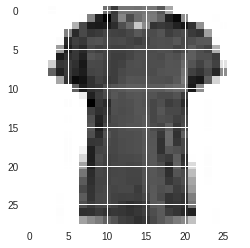

In [80]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(data[10], interpolation='nearest')
plt.show()

# Reshaping the data

---



In [0]:
data_train = data_train.reshape(data_train.shape[0], 28, 28,1).astype('float32')
data_test = data_test.reshape(data_test.shape[0], 28, 28,1).astype('float32')

In [58]:
label_train = np_utils.to_categorical(label_train)
label_test = np_utils.to_categorical(label_test)
num_classes = label_test.shape[1]
print(num_classes)

7


# Basic CNN model using Keras

---

1. 4 Convolutional layers
2. 2 Maxpooling layers
3. 2 Fully connected layers
4. Optimizer used : Adam

Dropout is added to avoid overfitting.

In [0]:
def cnn_model():
    model = Sequential()
    
    #1. LAYER
    model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', input_shape=(28, 28, 1)))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(Dropout(0.25))

    #2. LAYER
    model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same'))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))


    #3. LAYER
    model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same'))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(Dropout(0.25))
    
    #4. LAYER
    model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same'))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    #FULLY CONNECTED LAYER
    model.add(Flatten())
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(Dropout(0.25))
    
    model.add(Dense(256))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(Dropout(0.5))
    
    #OUTPUT LAYER
    model.add(Dense(7, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    
    return model

In [82]:
model = cnn_model()
history = model.fit(data_train, label_train, validation_data=(data_test, label_test), \
                    epochs=30, batch_size=32, verbose=2)
scores = model.evaluate(data_test, label_test, verbose=0)
print('CNN Error {}'.format(100-scores[1]*100))

Train on 6400 samples, validate on 1600 samples
Epoch 1/30
 - 8s - loss: 0.9721 - acc: 0.6284 - val_loss: 0.6123 - val_acc: 0.7425
Epoch 2/30
 - 4s - loss: 0.6147 - acc: 0.7547 - val_loss: 0.4646 - val_acc: 0.8106
Epoch 3/30
 - 4s - loss: 0.5038 - acc: 0.8011 - val_loss: 0.4184 - val_acc: 0.8325
Epoch 4/30
 - 4s - loss: 0.4731 - acc: 0.8169 - val_loss: 0.4451 - val_acc: 0.8194
Epoch 5/30
 - 4s - loss: 0.4492 - acc: 0.8242 - val_loss: 0.4353 - val_acc: 0.8181
Epoch 6/30
 - 4s - loss: 0.4143 - acc: 0.8394 - val_loss: 0.3887 - val_acc: 0.8387
Epoch 7/30
 - 4s - loss: 0.4017 - acc: 0.8445 - val_loss: 0.3814 - val_acc: 0.8456
Epoch 8/30
 - 4s - loss: 0.3847 - acc: 0.8509 - val_loss: 0.3653 - val_acc: 0.8562
Epoch 9/30
 - 4s - loss: 0.3740 - acc: 0.8512 - val_loss: 0.3513 - val_acc: 0.8544
Epoch 10/30
 - 4s - loss: 0.3512 - acc: 0.8639 - val_loss: 0.3611 - val_acc: 0.8588
Epoch 11/30
 - 4s - loss: 0.3335 - acc: 0.8709 - val_loss: 0.3517 - val_acc: 0.8562
Epoch 12/30
 - 4s - loss: 0.3269 - ac

# Visualizing the loss and accuracy curves

---



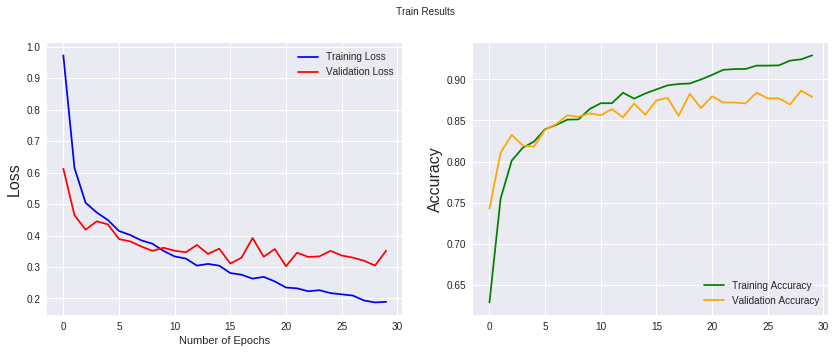

In [83]:
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.suptitle('Train Results', fontsize=10)
plt.xlabel("Number of Epochs")
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['acc'], color='green', label='Training Accuracy')
plt.plot(history.history['val_acc'], color='orange', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# Testing the model

---



In [0]:
with open('test_image.pkl', 'rb') as f:
    test_data = pickle.load(f)
    test_data = np.array(test_data)
    test_data = test_data.reshape(-1, 28, 28,1)

# Saving the prediction into a CSV file

---



In [0]:
predictions = model.predict(test_data)
predictions = np.argmax(predictions, axis=1)
predictions = pd.Series(predictions, name="Class")
submit = pd.concat([pd.Series(range(2000), name="Image_index"), predictions], axis=1)
submit.to_csv("Rishav_Ray.csv", index=False)